In [ ]:
import string
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
GBcomments = pd.read_csv("created_csvfiles/Cleaned_comments_witth Label.csv", index_col = "video_id") #
GBcomments.head()

,label,clean_comment,Label
video_id,,,
jt2OHQh0HoQ,False,it s more accurate to call it the m 1000 becau...,0
jt2OHQh0HoQ,False,to be there with a samsung phone n,0
jt2OHQh0HoQ,False,thank gosh a place i can watch it without havi...,0
jt2OHQh0HoQ,False,what happened to the home button on the iphone...,0
jt2OHQh0HoQ,False,power is the disease care is the cure keep car...,0


In [7]:
GBcomments.duplicated().sum()

5572

In [8]:
GBcomments.drop_duplicates()

,label,clean_comment,Label
video_id,,,
jt2OHQh0HoQ,False,it s more accurate to call it the m 1000 becau...,0
jt2OHQh0HoQ,False,to be there with a samsung phone n,0
jt2OHQh0HoQ,False,thank gosh a place i can watch it without havi...,0
jt2OHQh0HoQ,False,what happened to the home button on the iphone...,0
jt2OHQh0HoQ,False,power is the disease care is the cure keep car...,0
...,...,...,...
lLN1FwiqGwc,False,gasp n gasp n gasp,0
lLN1FwiqGwc,False,yeah but does everybody float,0
lLN1FwiqGwc,False,that meme me d ace,0


In [9]:
GBcomments.shape

(358024, 3)

In [10]:
GBcomments.isna().sum()
newdf = GBcomments.dropna()
newdf.isna().sum()

label            0
clean_comment    0
Label            0
dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(newdf["clean_comment"], newdf["Label"])

In [12]:
tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_train_tfidf.shape

(268517, 49845)

In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [14]:
X_test_tfidf = tfidf_vect.transform(X_test)
predictions = model.predict(X_test_tfidf)
len(predictions)

89506

In [15]:
confusion_matrix(y_test, predictions)

array([[86882,    15],
       [ 1836,   773]], dtype=int64)

In [16]:
model.score(X_test_tfidf, y_test)

0.9793198221348289

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     86897
           1       0.98      0.30      0.46      2609

    accuracy                           0.98     89506
   macro avg       0.98      0.65      0.72     89506
weighted avg       0.98      0.98      0.97     89506



In [132]:
results = pd.DataFrame({
    'predictions':model.predict(X_test_tfidf),
    'true_values':y_test
})
results.head()

,predictions,true_values
video_id,,
PbGSiJ9iat8,0,0
0pwttmAYCTw,0,0
3JYl1XREYLE,0,0
6L-nhETPAfY,0,0
TYR_7CeO39E,0,0


In [60]:
y_train_pred = model.predict(X_train_tfidf)

accuracy_score(y_train, y_train_pred)

0.9801055426658275

In [61]:
# testing accuracy
y_test_pred = model.predict(X_test_tfidf)

accuracy_score(y_test, y_test_pred)

0.9793198221348289

In [67]:
results.reset_index (inplace= True)

In [113]:
#calculate the perc of spam per video_id
def spam_comments_per_videoid(videoid):
    
    r1 = results.loc[results["video_id"] == videoid, :].count()
    r2 = results.loc[results["video_id"] == videoid, :].sum()
    perc = r2.true_values/r1.true_values
    
    return perc

In [114]:
videoid = "zyPIdeF4NFI"
videos = []
for i in (results["video_id"]):
    if i == videoid:
        videos = results.loc[results["video_id"] == videoid, :]
#videos      

In [115]:
spam_comments_per_videoid("zyPIdeF4NFI")

0.08771929824561403

In [157]:
to_plot = results.groupby("video_id").size().reset_index(name="video_count")
to_plot_1 = results.groupby("video_id").agg({'predictions': 'sum'})

In [136]:
df = pd.merge(to_plot, to_plot_1, on = "video_id")

In [179]:
df["perc"] = df["predictions"]/ df["video_count"]
df.to_csv("spam_perc_by_videoid.csv")
df.sort_values(by = "predictions", ascending = False)  

,video_id,video_count,predictions,perc
1262,jt2OHQh0HoQ,98,16,0.163265
432,GO6qs83CHpc,136,12,0.088235
1438,r9-DM9uBtVI,249,11,0.044177
1550,vQ3XgMKAgxc,205,8,0.039024
1474,scIizw2asro,191,6,0.031414
...,...,...,...,...
646,OctiAjHyn_o,56,0,0.000000
643,OWcF-AttnBU,16,0,0.000000
642,OOwfl8yY7nc,192,0,0.000000
640,OMW_dPtm7Bo,82,0,0.000000


In [173]:
def perc_spam_comments_per_videoid(videoid):
    
    r1 = df.loc[df["video_id"] == videoid, :]
    r1.plot.bar()
    return r1

,video_id,video_count,predictions,perc
1262,jt2OHQh0HoQ,98,16,0.163265


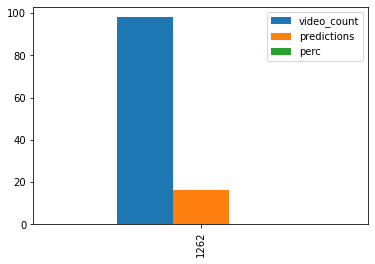

In [180]:
perc_spam_comments_per_videoid("jt2OHQh0HoQ")